In [1]:
#import dependencies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
#read csv
df = pd.read_csv('Raw_Data/data_arrhythmia.csv',delimiter = ';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
#Pull variables of interest
new_df = df[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']]
new_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8
1,56,1,165,64,81,174,401,149,39,25,53,6
2,54,0,172,95,138,163,386,185,102,96,75,10
3,55,0,175,94,100,202,380,179,143,28,71,1
4,75,0,190,80,88,181,360,177,103,-16,?,7


In [4]:
#Find any null variables
new_df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
heart_rate      0
diagnosis       0
dtype: int64

In [5]:
#Arrhythmia = 1
new_df['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [6]:
# number of heart arrhythmias not of interest
sum(df['diagnosis']!=1)

207

In [7]:
# Number of Arrhythmia of interest
sum(df['diagnosis']==1)

245

In [8]:
#Set arrhythmia of interest = 1
dummy_df = new_df.join(pd.get_dummies(new_df['diagnosis']==1))
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [9]:
#drop false column
dummy_df.drop(columns=[False],axis=1,inplace=True)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [10]:
#Rename True column to Arrhythmia diagnosis
dummy_df.rename(columns={True:'arr_diagnosis'},inplace=True)

In [11]:
#DF (Updated: LL)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [12]:
#DF Summary Statistics (Updated; LL)
dummy_df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,diagnosis,arr_diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,3.880531,0.542035
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,4.407097,0.498782
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,1.000000,0.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,1.000000,0.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,6.000000,1.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,16.000000,1.000000


- age, pr_interval, p_interval has a min value of '0' (LL)

In [13]:
#Find rows with "0" in 'age' column(Updated: LL)
dummy_df[dummy_df['age'] == 0]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
316,0,0,608,10,83,126,232,128,60,125,163,5,0


In [14]:
#Find rows with "0" in 'p-r_interval' column (Updated: LL)
dummy_df[dummy_df['p-r_interval'] == 0]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
7,49,1,162,54,78,0,376,157,70,67,67,1,1
56,38,1,160,63,79,0,376,165,0,34,70,1,1
64,48,1,155,55,81,0,382,209,63,75,67,1,1
106,46,0,165,55,82,0,415,108,0,-1,63,6,0
108,17,0,170,61,97,0,353,141,0,90,86,2,0
174,55,1,156,78,88,0,380,138,0,79,71,15,0
217,66,1,160,60,73,0,364,144,0,27,81,15,0
219,77,0,165,77,98,0,359,149,0,79,59,16,0
243,49,1,166,87,78,0,322,122,0,70,115,15,0
284,73,0,165,58,104,0,372,159,117,-26,64,10,0


In [15]:
#Find rows with "0" in 'p_interval' column (Updated: LL)
dummy_df[dummy_df['p_interval'] == 0]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
56,38,1,160,63,79,0,376,165,0,34,70,1,1
106,46,0,165,55,82,0,415,108,0,-1,63,6,0
108,17,0,170,61,97,0,353,141,0,90,86,2,0
174,55,1,156,78,88,0,380,138,0,79,71,15,0
217,66,1,160,60,73,0,364,144,0,27,81,15,0
219,77,0,165,77,98,0,359,149,0,79,59,16,0
243,49,1,166,87,78,0,322,122,0,70,115,15,0
298,12,1,165,47,91,0,359,152,0,8,68,10,0
300,59,0,165,65,121,0,329,160,0,66,75,15,0
308,62,1,170,110,97,0,294,184,0,39,100,2,0


- Removing row with a "0" value in age column, as values are confusing

In [16]:
#heart_rate column had string '?', this will remove the row (Updated: LL)
# replaced = dummy_df.replace(['?'],0)
dummy_df = dummy_df.loc[dummy_df['heart_rate'] !='?']

In [17]:
#Dtype review (Updated: LL)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 451
Data columns (total 13 columns):
age              451 non-null int64
sex              451 non-null int64
height           451 non-null int64
weight           451 non-null int64
qrs_duration     451 non-null int64
p-r_interval     451 non-null int64
q-t_interval     451 non-null int64
t_interval       451 non-null int64
p_interval       451 non-null int64
qrs              451 non-null int64
heart_rate       451 non-null object
diagnosis        451 non-null int64
arr_diagnosis    451 non-null uint8
dtypes: int64(11), object(1), uint8(1)
memory usage: 46.2+ KB


In [18]:
# Removing rows with "0" value in "age" (Updated: LL)
dummy_df = dummy_df.loc[dummy_df['age'] != 0]
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 451
Data columns (total 13 columns):
age              450 non-null int64
sex              450 non-null int64
height           450 non-null int64
weight           450 non-null int64
qrs_duration     450 non-null int64
p-r_interval     450 non-null int64
q-t_interval     450 non-null int64
t_interval       450 non-null int64
p_interval       450 non-null int64
qrs              450 non-null int64
heart_rate       450 non-null object
diagnosis        450 non-null int64
arr_diagnosis    450 non-null uint8
dtypes: int64(11), object(1), uint8(1)
memory usage: 46.1+ KB


In [19]:
#Confirmation of row removal (Updated: LL)
dummy_df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
5,13,0,169,51,100,167,321,174,91,107,84,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,63,1,1
448,37,0,190,85,100,137,361,201,73,86,73,10,0
449,36,0,166,68,108,176,365,194,116,-85,84,2,0
450,32,1,155,55,93,106,386,218,63,54,80,1,1


In [20]:
#change all columns to integer (Updated: LL)
replaced_df = dummy_df.astype(int)
replaced_df.dtypes

age              int32
sex              int32
height           int32
weight           int32
qrs_duration     int32
p-r_interval     int32
q-t_interval     int32
t_interval       int32
p_interval       int32
qrs              int32
heart_rate       int32
diagnosis        int32
arr_diagnosis    int32
dtype: object

In [21]:
replaced_df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
5,13,0,169,51,100,167,321,174,91,107,84,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,63,1,1
448,37,0,190,85,100,137,361,201,73,86,73,10,0
449,36,0,166,68,108,176,365,194,116,-85,84,2,0
450,32,1,155,55,93,106,386,218,63,54,80,1,1


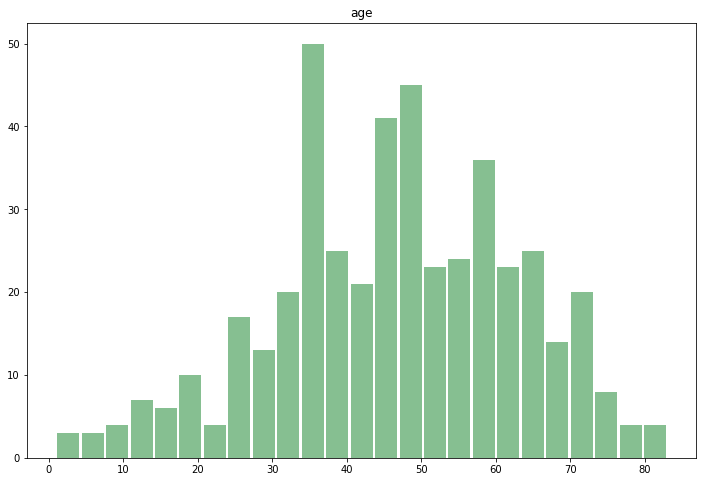

In [22]:
#Distribution of age
ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

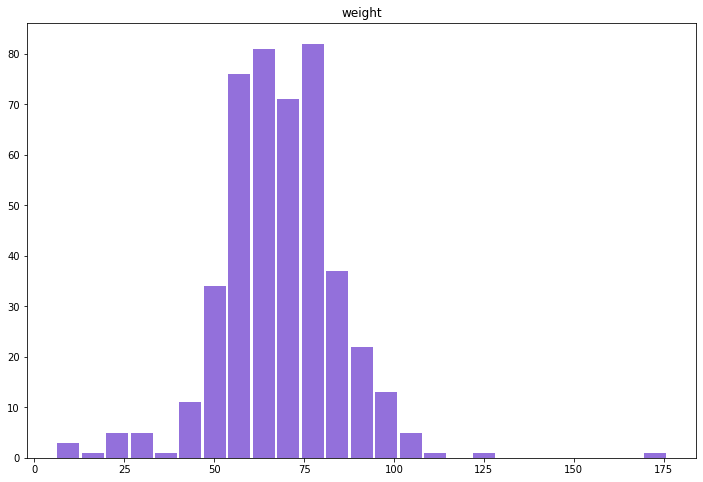

In [23]:
#Distribution of weight
ax = replaced_df.hist(column='weight', bins=25, grid=False, figsize=(12,8), color='mediumpurple', zorder=2, rwidth=0.9)

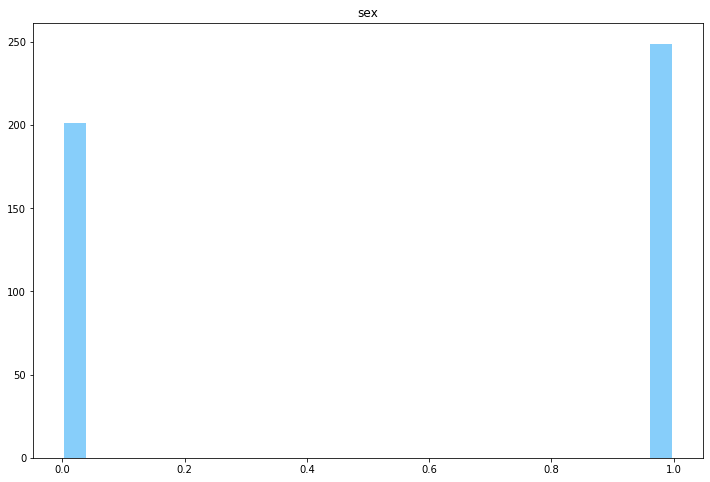

In [24]:
#Distribution of Sex
#Male = 0
#Female = 1
ax = replaced_df.hist(column='sex', bins=25, grid=False, figsize=(12,8), color='lightskyblue', zorder=2, rwidth=0.9)

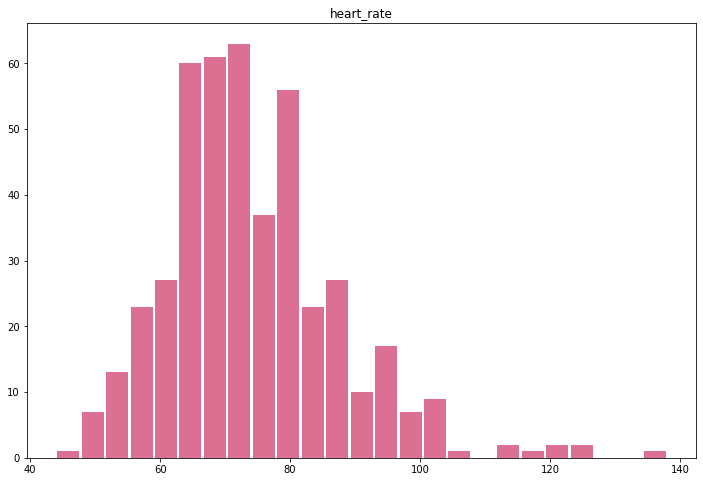

In [25]:
#Distribution of heart rate
ax = replaced_df.hist(column='heart_rate', bins=25, grid=False, figsize=(12,8), color='palevioletred', zorder=2, rwidth=0.9)

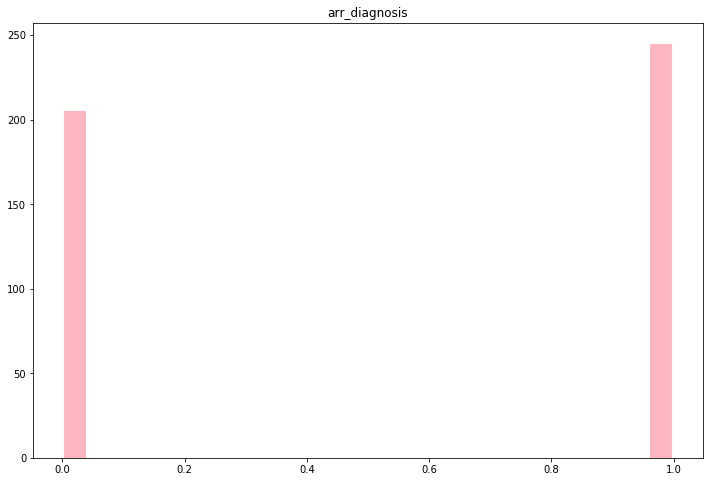

In [26]:
#Distribution of diagnosis of interest
ax = replaced_df.hist(column='arr_diagnosis', bins=25, grid=False, figsize=(12,8), color='lightpink', zorder=2, rwidth=0.9)

In [27]:
import seaborn as sns

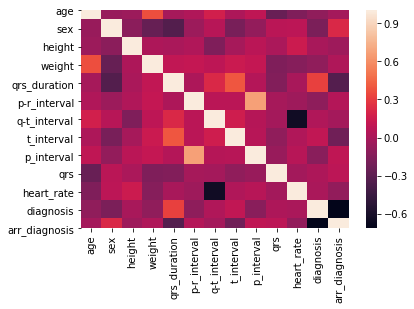

In [28]:
sns.heatmap(replaced_df.corr())

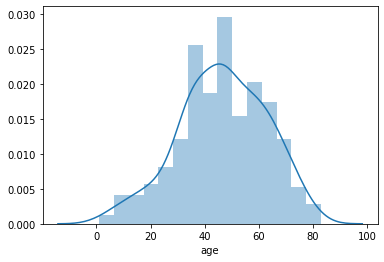

In [29]:
sns.distplot(replaced_df['age'])

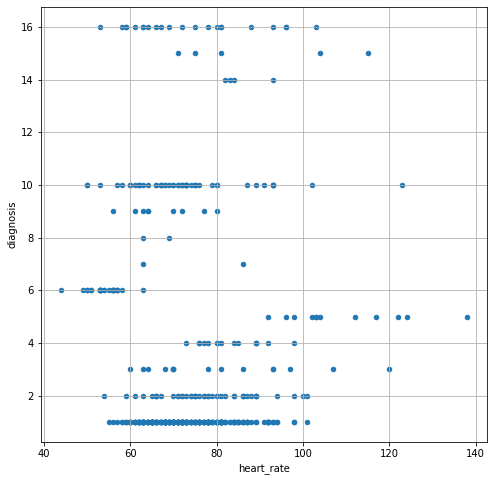

In [30]:
replaced_df.plot(kind="scatter", x="heart_rate", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

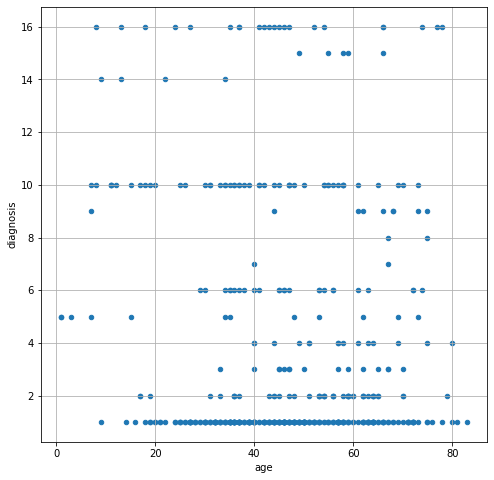

In [31]:
replaced_df.plot(kind="scatter", x="age", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

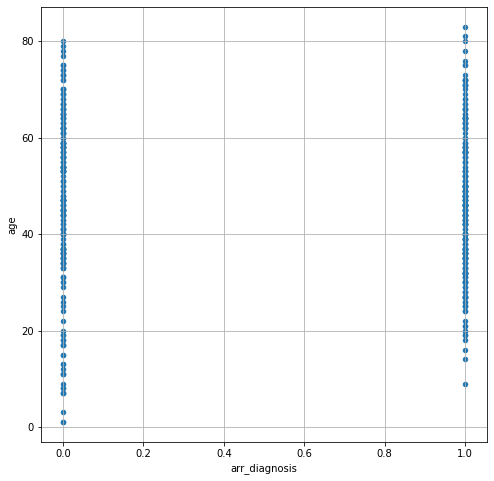

In [32]:
replaced_df.plot(kind="scatter", x="arr_diagnosis", y="age", grid=True, figsize=(8,8),
              title="")
plt.show()

In [33]:
# Use Pandas to read data
clean_data_df = pd.read_csv('Raw_Data/clean_data.csv')

In [34]:
grouped_sex_df = clean_data_df.groupby(['sex'])
sex_presence = grouped_sex_df["arr_diagnosis"].sum()
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})

In [35]:
sex_summary_df['Gender']=('Male','Female')
sex_summary_df

,Number of Arrhythmias,Gender
sex,,
0,85,Male
1,160,Female


In [37]:
sex_summary_df_new =sex_summary_df.set_index('Gender')

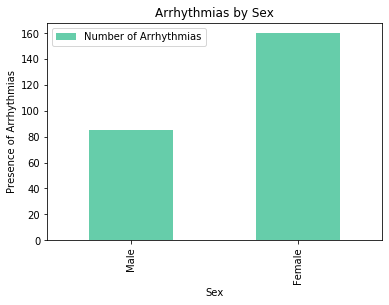

<Figure size 432x288 with 0 Axes>

In [42]:
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})
colors = ["mediumaquamarine", "cornflowerblue"]
# Chart our data, give it a title, and label the axes
sex_chart = sex_summary_df_new.plot(kind="bar",title="Arrhythmias by Sex", color=colors)
sex_chart.set_xlabel("Sex")
sex_chart.set_ylabel("Presence of Arrhythmias")
plt.show()
plt.savefig('bar chart sex and no.')

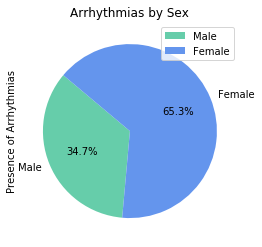

In [45]:
labels = ['Male','Female']
colors = ["mediumaquamarine", "cornflowerblue"]
# Create a pie chart based upon the arrhythmia presence for each sex
sex_pie = sex_summary_df.plot(kind="pie", y='Number of Arrhythmias', labels=labels,title=("Arrhythmias by Sex"), colors=colors, autopct="%1.1f%%", startangle=140)
sex_pie.set_ylabel("Presence of Arrhythmias")
plt.savefig('pie chart gender')
plt.show()




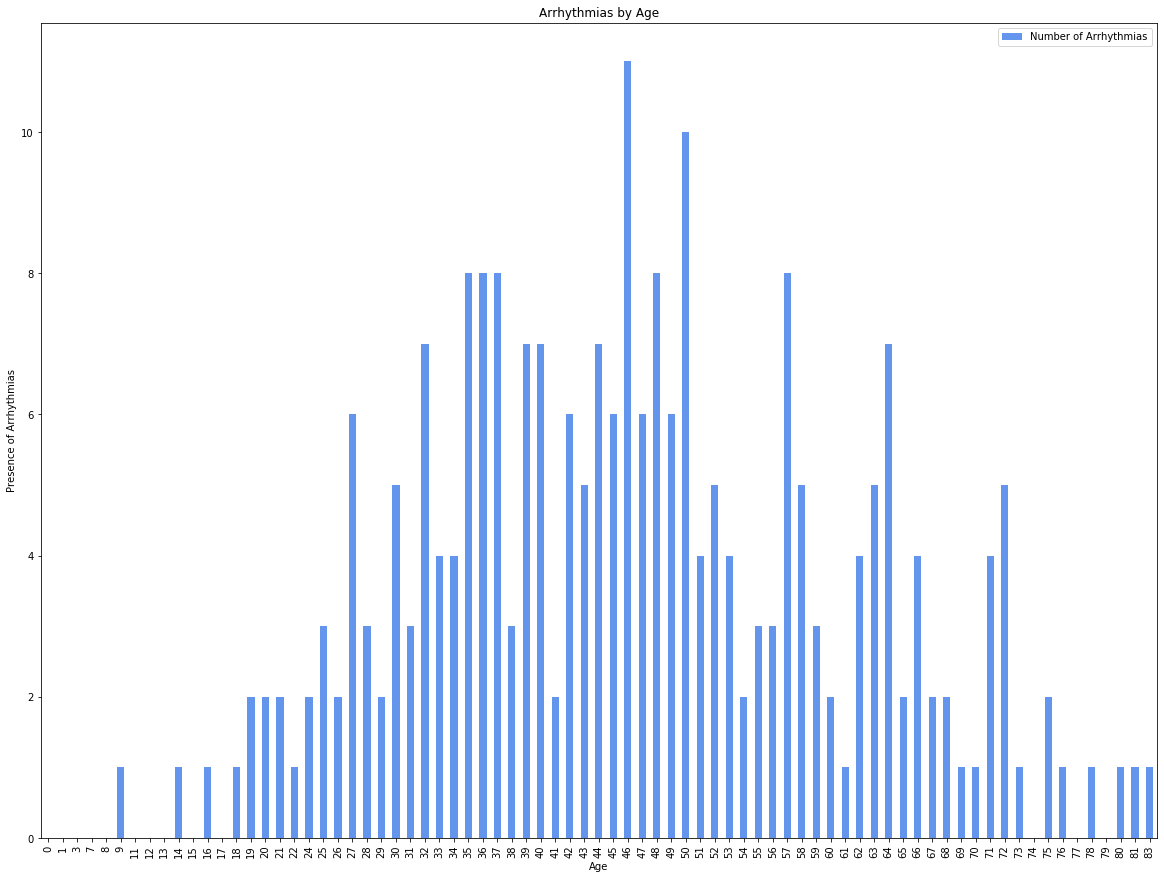

In [108]:
# Using GroupBy in order to separate the data into fields according to "age" values
grouped_age_df = clean_data_df.groupby(['age'])
age_presence = grouped_age_df["arr_diagnosis"].sum()
age_summary_df = pd.DataFrame({"Number of Arrhythmias": age_presence})
# Chart our data, give it a title, and label the axes
age_chart = age_summary_df.plot(kind="bar", title="Arrhythmias by Age", color='cornflowerblue', figsize=(20,15))
age_chart.set_xlabel("Age")
age_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

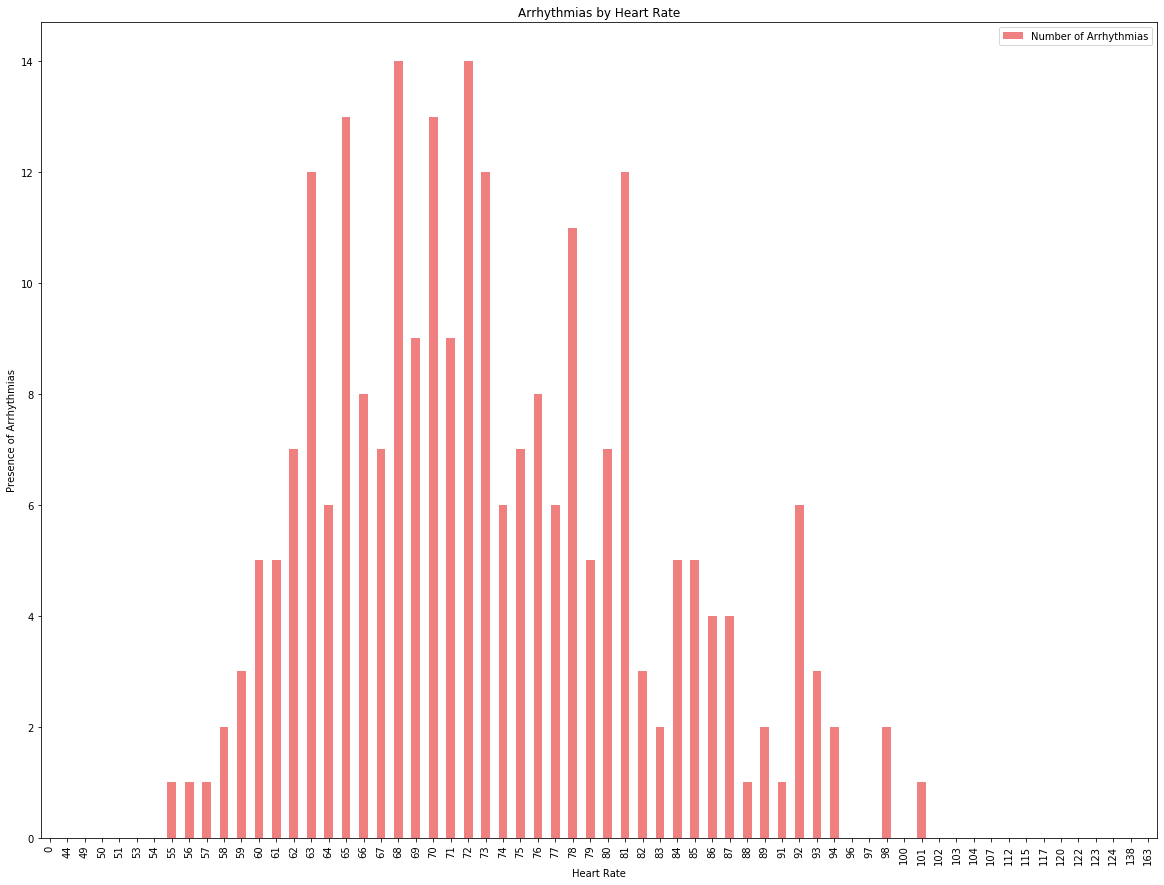

In [109]:
# Using GroupBy in order to separate the data into fields according to "heart rate" values
grouped_rate_df = clean_data_df.groupby(['heart_rate'])
rate_presence = grouped_rate_df["arr_diagnosis"].sum()
rate_summary_df = pd.DataFrame({"Number of Arrhythmias": rate_presence})
# Chart our data, give it a title, and label the axes
rate_chart = rate_summary_df.plot(kind="bar", title="Arrhythmias by Heart Rate", color='lightcoral', figsize=(20,15))
rate_chart.set_xlabel("Heart Rate")
rate_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

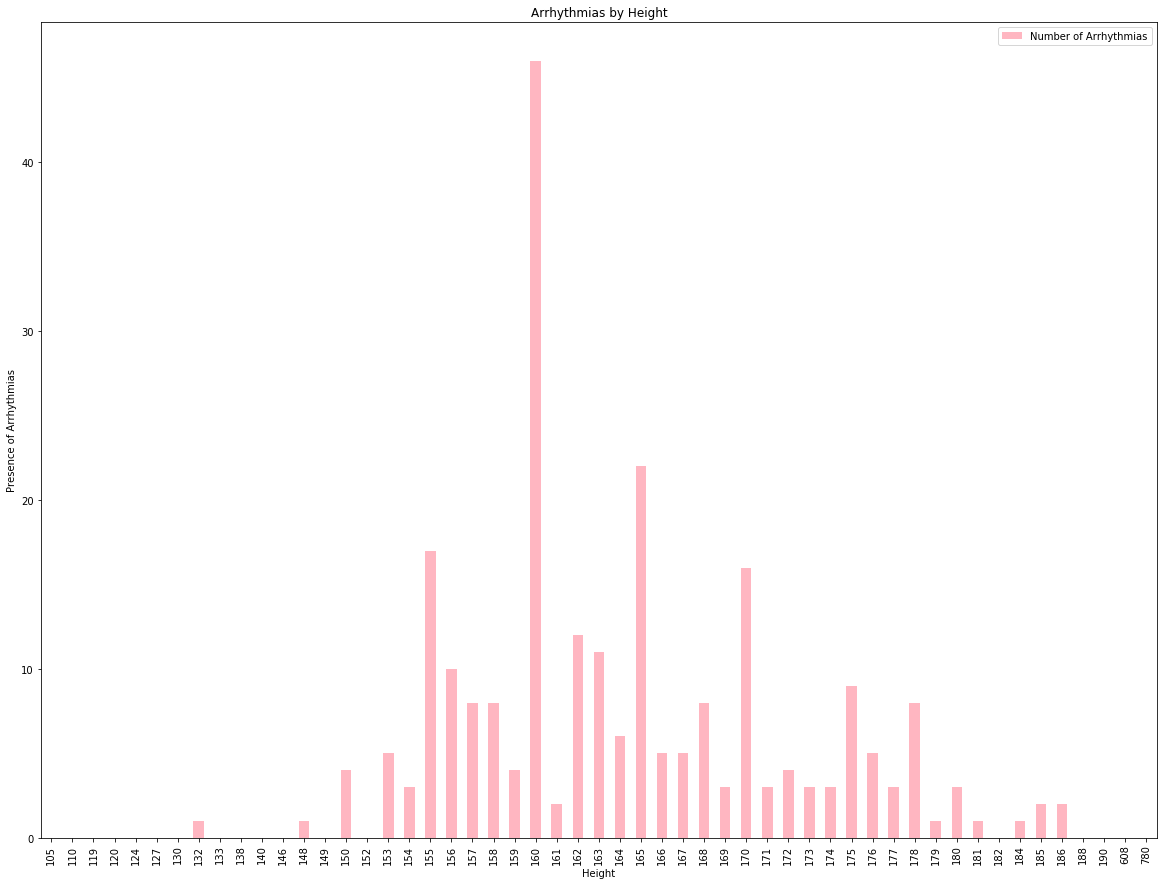

In [110]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_height_df = clean_data_df.groupby(['height'])
height_presence = grouped_height_df["arr_diagnosis"].sum()
height_summary_df = pd.DataFrame({"Number of Arrhythmias": height_presence})
# Chart our data, give it a title, and label the axes
height_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Height", color='lightpink', figsize=(20,15))
height_chart.set_xlabel("Height")
height_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

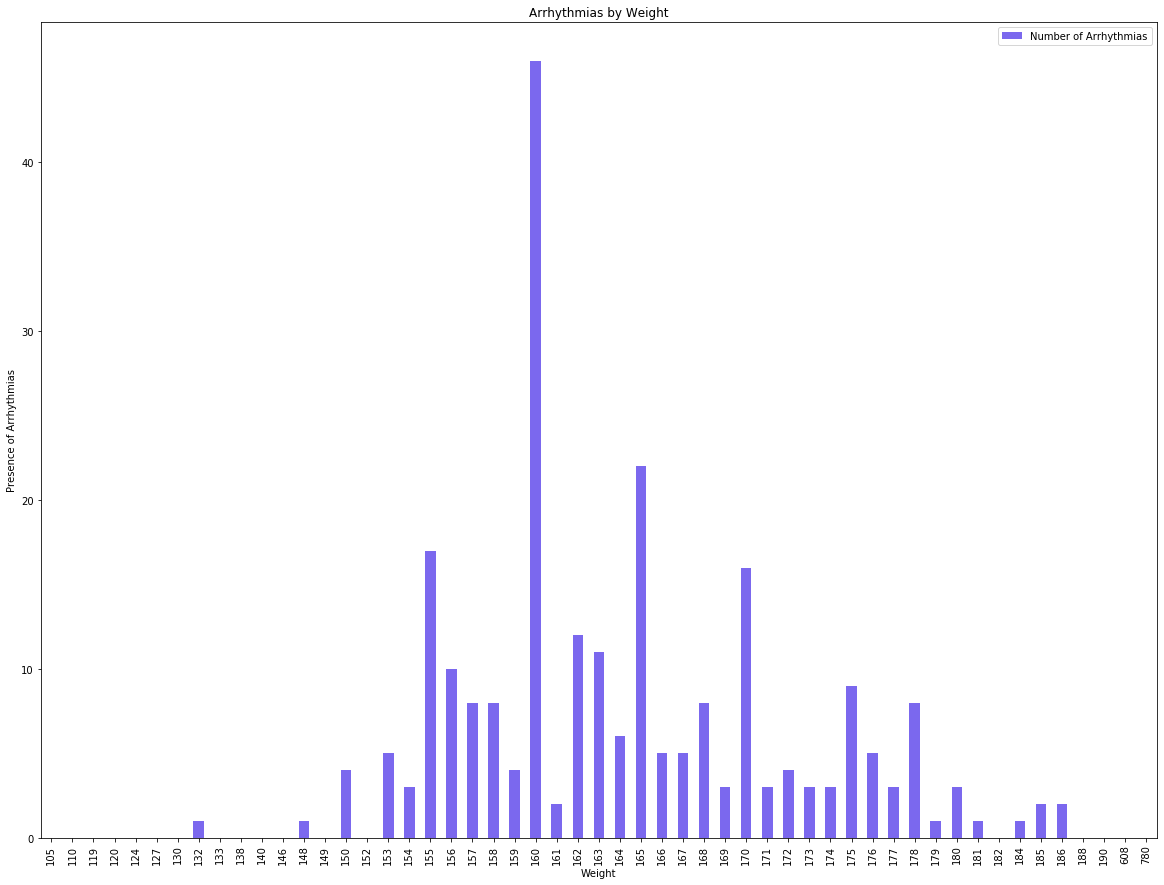

In [111]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_weight_df = clean_data_df.groupby(['weight'])
weight_presence = grouped_weight_df["arr_diagnosis"].sum()
weight_summary_df = pd.DataFrame({"Number of Arrhythmias": weight_presence})
# Chart our data, give it a title, and label the axes
weight_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Weight", color='mediumslateblue', figsize=(20,15))
weight_chart.set_xlabel("Weight")
weight_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

In [112]:
#Create new dataFrame for BMI Analysis
ll_replaced_df = replaced_df

In [113]:
#Replace column headers
ll_replaced_df = ll_replaced_df.rename(columns={'p-r_interval':'pr_interval', 'q-t_interval':'qt_interval'})
ll_replaced_df.head()

,age,sex,height,weight,qrs_duration,pr_interval,qt_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
5,13,0,169,51,100,167,321,174,91,107,84,14,0


In [114]:
#Creation of "BMI" column (BMI formula found: https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_2.html)
weight = ll_replaced_df['weight']
height = ll_replaced_df['height']
ll_replaced_df['bmi'] = round((weight/height/height)*10000,2)
ll_replaced_df

,age,sex,height,weight,qrs_duration,pr_interval,qt_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,bmi
0,75,0,190,80,91,193,371,174,121,-16,63,8,0,22.16
1,56,1,165,64,81,174,401,149,39,25,53,6,0,23.51
2,54,0,172,95,138,163,386,185,102,96,75,10,0,32.11
3,55,0,175,94,100,202,380,179,143,28,71,1,1,30.69
5,13,0,169,51,100,167,321,174,91,107,84,14,0,17.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,27.34
448,37,0,190,85,100,137,361,201,73,86,73,10,0,23.55
449,36,0,166,68,108,176,365,194,116,-85,84,2,0,24.68
450,32,1,155,55,93,106,386,218,63,54,80,1,1,22.89


In [115]:
#Creation of "Weight Status" column (Found: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
def weight_to_status(i):
    if i < 18.50:
        return "Underweight"
    if i < 25.00 and i >= 18.50:
        return "Healthy weight"
    if i < 30.00 and i >= 25.00:
        return "Overweight"
    if i >= 30.00:
        return "Obese"
ll_replaced_df['weight_status'] = ll_replaced_df['bmi'].apply(weight_to_status)
ll_replaced_df.head()

,age,sex,height,weight,qrs_duration,pr_interval,qt_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,bmi,weight_status
0,75,0,190,80,91,193,371,174,121,-16,63,8,0,22.16,Healthy weight
1,56,1,165,64,81,174,401,149,39,25,53,6,0,23.51,Healthy weight
2,54,0,172,95,138,163,386,185,102,96,75,10,0,32.11,Obese
3,55,0,175,94,100,202,380,179,143,28,71,1,1,30.69,Obese
5,13,0,169,51,100,167,321,174,91,107,84,14,0,17.86,Underweight


In [116]:
#Creation of Age bins columns (Found: https://www.learnersdictionary.com/qa/Age-by-Decade)
bins = [0,9.9,19.9,29.9,39.9,49.9,59.9,69.9,79.9,89.9]
labels = ['<10','Denarian','Vicenarian', 'Tricenarian', 'Quadragenarian', 'Quinquagenarian',
         'Sexagenarian', 'Septuagenarian', 'Octogenarian',]
ll_replaced_df['age_bin'] = pd.cut(ll_replaced_df['age'],bins,labels=labels,include_lowest=True)
ll_replaced_df

,age,sex,height,weight,qrs_duration,pr_interval,qt_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis,bmi,weight_status,age_bin
0,75,0,190,80,91,193,371,174,121,-16,63,8,0,22.16,Healthy weight,Septuagenarian
1,56,1,165,64,81,174,401,149,39,25,53,6,0,23.51,Healthy weight,Quinquagenarian
2,54,0,172,95,138,163,386,185,102,96,75,10,0,32.11,Obese,Quinquagenarian
3,55,0,175,94,100,202,380,179,143,28,71,1,1,30.69,Obese,Quinquagenarian
5,13,0,169,51,100,167,321,174,91,107,84,14,0,17.86,Underweight,Denarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,63,1,1,27.34,Overweight,Quinquagenarian
448,37,0,190,85,100,137,361,201,73,86,73,10,0,23.55,Healthy weight,Tricenarian
449,36,0,166,68,108,176,365,194,116,-85,84,2,0,24.68,Healthy weight,Tricenarian
450,32,1,155,55,93,106,386,218,63,54,80,1,1,22.89,Healthy weight,Tricenarian


In [117]:
#Counts of weight status group with use of Groupby function on weight status
ws_group = ll_replaced_df.groupby(['weight_status'])
ws_count = ws_group.count()['age']
ws_count

weight_status
Healthy weight    193
Obese              60
Overweight        170
Underweight        27
Name: age, dtype: int64

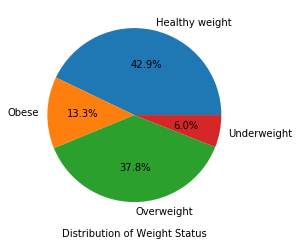

In [118]:
#Generate Pie plot showing distribution of weight status
ws_count.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.xlabel('Distribution of Weight Status')
plt.savefig('ll_images/Distribution of Weight Status')

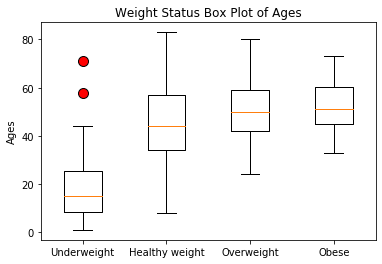

In [119]:
#Generate box plot
box_plot_data = []
ws_list = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']
for status in ws_list:
    weight_df = ll_replaced_df.loc[ll_replaced_df['weight_status'] == status]
    ages = weight_df['age']
    box_plot_data.append(ages)
plt.boxplot(box_plot_data, labels = ws_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('Ages')
plt.title('Weight Status Box Plot of Ages')
plt.savefig('ll_images/Weight Status Box Plot of Ages')
plt.show()

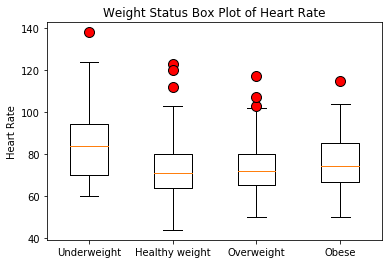

In [120]:
#Generate box plot
box_plot_data = []
ws_list = ['Underweight','Healthy weight', 'Overweight', 'Obese']
for status in ws_list:
    weight_df = ll_replaced_df.loc[ll_replaced_df['weight_status'] == status]
    hr = weight_df['heart_rate']
    box_plot_data.append(hr)
plt.boxplot(box_plot_data, labels = ws_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('Heart Rate')
plt.title('Weight Status Box Plot of Heart Rate')
plt.savefig('ll_images/Weight Status Box Plot of Heart Rate')
plt.show()

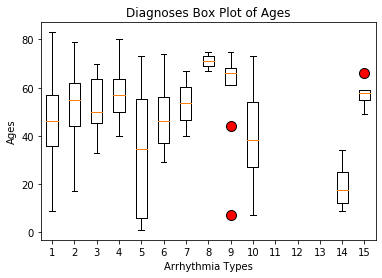

In [121]:
#Generate box plot
box_plot_data = []
type_list = [1, 2, 3, 4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for arrhythmia in type_list:
    arrhythmia_df = ll_replaced_df.loc[ll_replaced_df['diagnosis'] == arrhythmia]
    ages = arrhythmia_df['age']
    box_plot_data.append(ages)
plt.boxplot(box_plot_data, labels = type_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10},)
plt.xticks(rotation = 0)
plt.ylabel('Ages')
plt.xlabel('Arrhythmia Types')
plt.title('Diagnoses Box Plot of Ages')
plt.savefig('ll_images/Diagnoses Box Plot of Ages')
plt.show()

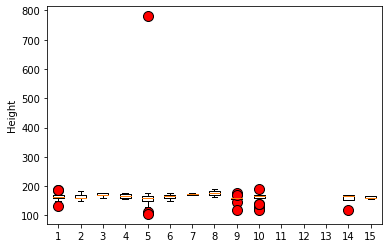

In [122]:
#Generate box plot
box_plot_data = []
type_list = [1, 2, 3, 4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for arrhythmia in type_list:
    arrhythmia_df = ll_replaced_df.loc[ll_replaced_df['diagnosis'] == arrhythmia]
    height = arrhythmia_df['height']
    box_plot_data.append(height)
plt.boxplot(box_plot_data, labels = type_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('Height')
plt.show()

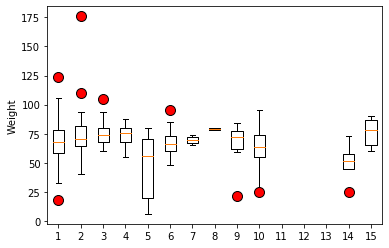

In [123]:
#Generate box plot
box_plot_data = []
type_list = [1, 2, 3, 4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for arrhythmia in type_list:
    arrhythmia_df = ll_replaced_df.loc[ll_replaced_df['diagnosis'] == arrhythmia]
    weight = arrhythmia_df['weight']
    box_plot_data.append(weight)
plt.boxplot(box_plot_data, labels = type_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('Weight')
plt.show()

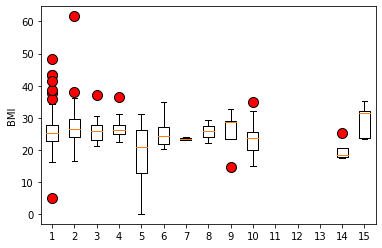

In [124]:
#Generate box plot
box_plot_data = []
type_list = [1, 2, 3, 4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for arrhythmia in type_list:
    arrhythmia_df = ll_replaced_df.loc[ll_replaced_df['diagnosis'] == arrhythmia]
    bmi = arrhythmia_df['bmi']
    box_plot_data.append(bmi)
plt.boxplot(box_plot_data, labels = type_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('BMI')
plt.show()

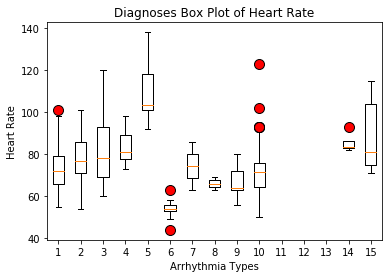

In [125]:
#Generate Diagnoses Box Plot of Heart Rate
box_plot_data = []
type_list = [1, 2, 3, 4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for arrhythmia in type_list:
    arrhythmia_df = ll_replaced_df.loc[ll_replaced_df['diagnosis'] == arrhythmia]
    hr = arrhythmia_df['heart_rate']
    box_plot_data.append(hr)
plt.boxplot(box_plot_data, labels = type_list, flierprops={'markerfacecolor':'red',
                                                         'markersize': 10})
plt.xticks(rotation = 0)
plt.ylabel('Heart Rate')
plt.xlabel('Arrhythmia Types')
plt.title('Diagnoses Box Plot of Heart Rate')
plt.savefig('ll_images/Diagnoses Box Plot of Heart Rate')
plt.show()

In [126]:
#Counts of weight status by gender group with use of Groupby function
ws_g_group = ll_replaced_df.groupby(['weight_status','sex'])
ws_g_counts = ws_g_group.count()['age']
ws_g_counts

weight_status   sex
Healthy weight  0       79
                1      114
Obese           0       19
                1       41
Overweight      0       93
                1       77
Underweight     0       10
                1       17
Name: age, dtype: int64

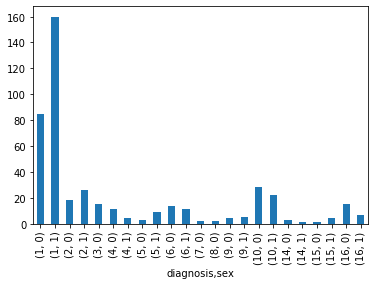

In [127]:
d_s_group = ll_replaced_df.groupby(['diagnosis','sex'])
d_s_group.count()['age'].plot(kind = 'bar')

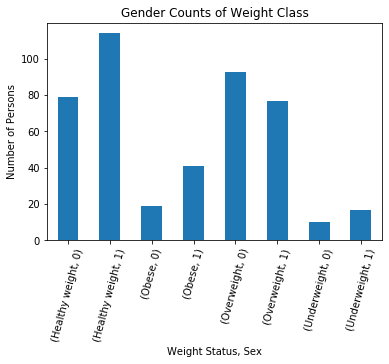

In [128]:
#Generate Bar Chart total number of data points in each weight status for each gender
ws_g_counts.plot(kind = 'bar')
plt.xlabel("Weight Status, Sex")
plt.ylabel("Number of Persons")
plt.xticks(rotation=75)
plt.title("Gender Counts of Weight Class")
plt.savefig("ll_images/Gender Counts of weight Class")
plt.show()

In [129]:
#Counts of age_bin group with use of Groupby function
ab_group = ll_replaced_df.groupby(['age_bin'])
ab_group = ab_group.count()['age']
ab_group

age_bin
<10                 10
Denarian            20
Vicenarian          30
Tricenarian         90
Quadragenarian     107
Quinquagenarian     91
Sexagenarian        66
Septuagenarian      32
Octogenarian         4
Name: age, dtype: int64

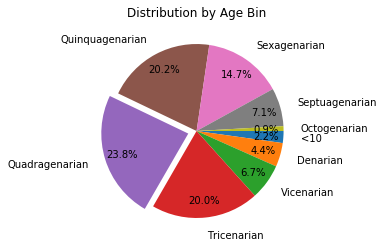

In [130]:
#Pie plot of 'age_bin' counts
ab_group.plot(kind = 'pie', autopct = '%1.1f%%', explode = [0,0,0,0,.1,0,0,0,0],
              pctdistance = .8, labeldistance =1.2, startangle = 0, counterclock = False)
plt.ylabel('')
plt.title('Distribution by Age Bin')
plt.show
plt.savefig('ll_images/Distribution by Age Bin')

In [131]:
quad = ll_replaced_df[ll_replaced_df['age_bin'] == 'Quadragenarian']
quad['diagnosis'].value_counts()

1     64
10     9
16     7
6      7
3      6
2      6
4      4
15     1
9      1
7      1
5      1
Name: diagnosis, dtype: int64

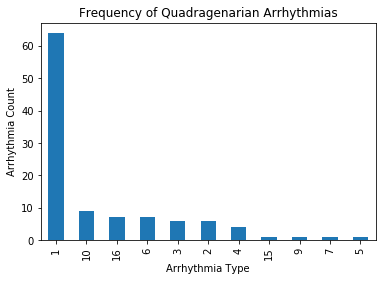

In [132]:
#Creation of Frequency of Quadragenarian Arrhythmias
quad['diagnosis'].value_counts().plot(kind = 'bar')
plt.title('Frequency of Quadragenarian Arrhythmias')
plt.ylabel('Arrhythmia Count')
plt.xlabel('Arrhythmia Type')
plt.savefig('ll_images/Frequency of Quadragenarian Arrhythmias')
plt.show()

In [133]:
age_mean = ws_group.mean()['age']
age_var = ws_group.var()['age']
age_std = ws_group.std()['age']
height_mean = ws_group.mean()['height']
weight_mean = ws_group.mean()['weight']
qrs_dur_mean = ws_group.mean()['qrs_duration']
pr_int_mean = ws_group.mean()['pr_interval']
qt_int_mean = ws_group.mean()['qt_interval']
t_int_mean = ws_group.mean()['t_interval']
p_int_mean = ws_group.mean()['p_interval']
qrs_mean = ws_group.mean()['qrs']
hr_mean = ws_group.mean()['heart_rate']
bmi_mean = ws_group.mean()['bmi']